Getting Started

Loading and reviewing the data set

In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Displaying the first fwe rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Inspecting the dataset

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [3]:
df.isnull().sum()

df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [4]:
import re

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<br\s*/?>', ' ', text)  # Replace <br/> with space
    text = re.sub(r'<[^>]+>', '', text)  # Remove any remaining HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join(text.split())  # Remove extra whitespace
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)

In [5]:
for i in range(5):  # Print the first 5 samples
    print(f"Original: {df.iloc[i]['review']}")
    print(f"Cleaned: {df.iloc[i]['cleaned_review']}\n")


Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

df[['sentiment', 'sentiment_encoded']].head()

df['sentiment_encoded'].value_counts()

sentiment_encoded
1    25000
0    25000
Name: count, dtype: int64

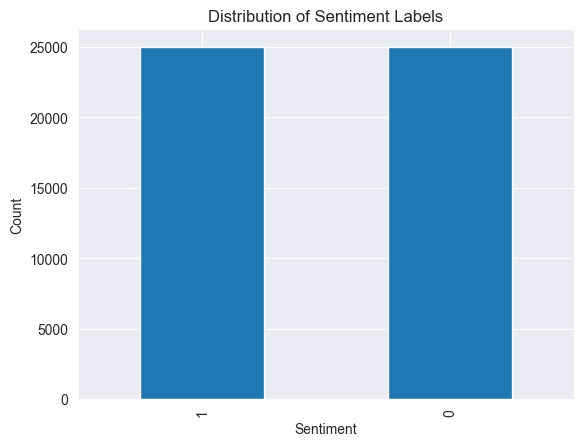

In [7]:
import matplotlib.pyplot as plt

# Plot distribution of sentiment labels
df['sentiment_encoded'].value_counts().plot(kind='bar')

plt.title('Distribution of Sentiment Labels')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [8]:
# Calculate the length of each cleaned review
review_lengths = df['cleaned_review'].str.len()

# Get a statistical summary of review lengths
print(review_lengths.describe())


count    50000.00000
mean      1245.44356
std        942.10757
min         30.00000
25%        667.00000
50%        924.00000
75%       1511.00000
max      13295.00000
Name: cleaned_review, dtype: float64


In [9]:
# Set the maximum length for reviews
MAX_LENGTH = 1500

# Truncate reviews longer than MAX_LENGTH
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x[:MAX_LENGTH])


In [10]:
# Set the minimum length for reviews
MIN_LENGTH = 700

# Pad reviews shorter than MIN_LENGTH
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: x.ljust(MIN_LENGTH))


In [11]:
print(df['cleaned_review'].apply(len).describe())

# Sample of truncated reviews
df[df['cleaned_review'].str.len() == MIN_LENGTH].sample(5)['cleaned_review']


count    50000.000000
mean      1037.590360
std        332.461491
min        700.000000
25%        700.000000
50%        924.000000
75%       1500.000000
max       1500.000000
Name: cleaned_review, dtype: float64


44277    i hired the dvd yesterday and first of all it ...
43862    the elite sniper team that has inserted 24h or...
8356     love it love it love it this is another absolu...
37908    i managed to sneak away one night and go to th...
6136     an our gang comedy short the gang coerces span...
Name: cleaned_review, dtype: object

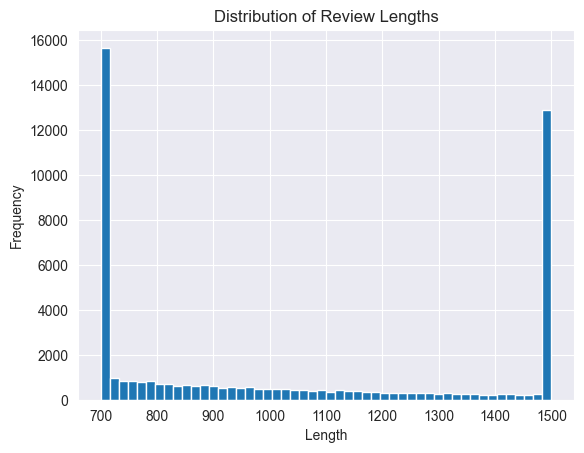

In [12]:
import matplotlib.pyplot as plt

plt.hist(df['cleaned_review'].apply(len), bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, min_df=5)

matrix = vectorizer.fit_transform(df['cleaned_review'])

In [14]:
# Convert the matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.shape)

(50000, 10000)


Splitting the data

In [15]:
from sklearn.model_selection import train_test_split

# Features and labels
X = matrix  
y = df['sentiment']


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Verify the split
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")


Training set size: (40000, 10000), (40000,)
Testing set size: (10000, 10000), (10000,)


In [18]:
# Review some sample data from the training set
print("Sample of cleaned reviews from training data:")
for i in range(5):  # Displaying first 5 samples
    print(f"Review {i+1}:")
    print(X_train[i])  # Print the feature vector
    print("Sentiment:", y_train.iloc[i])
    print()


Sample of cleaned reviews from training data:
Review 1:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 161 stored elements and shape (1, 10000)>
  Coords	Values
  (0, 6245)	0.026699224114247733
  (0, 6204)	0.10202826644075948
  (0, 8958)	0.22799068112206328
  (0, 6302)	0.03983732324340853
  (0, 4163)	0.03243215274654011
  (0, 8955)	0.10005879317490897
  (0, 4939)	0.03188441700488792
  (0, 895)	0.026602646894678145
  (0, 8985)	0.06387689510461914
  (0, 603)	0.05358402092994074
  (0, 655)	0.0718876402204351
  (0, 9003)	0.03615378025455133
  (0, 4783)	0.05417392737443459
  (0, 9760)	0.0999647771841424
  (0, 9853)	0.02243166431145058
  (0, 9676)	0.023970410119543293
  (0, 484)	0.10039918960570808
  (0, 9774)	0.0377414305670452
  (0, 4555)	0.07310441417880635
  (0, 3725)	0.08948972355697041
  (0, 6116)	0.025662727670637944
  (0, 3624)	0.06665431324370726
  (0, 9088)	0.0858192649134731
  (0, 4795)	0.03830340496514591
  (0, 6243)	0.0488674156932028
  :	:
  (0, 215)	0.1097933968

In [19]:
# Review some sample text data (not the vectorized form)
print("Sample of cleaned reviews from training data:")
for i in range(5):  # Displaying first 5 samples
    print(f"Review {i+1}:")
    print(df.iloc[y_train.index[i]]['cleaned_review'])  # Print the actual text review
    print("Sentiment:", y_train.iloc[i])
    print()


Sample of cleaned reviews from training data:
Review 1:
thats what i kept asking myself during the many fights screaming matches swearing and general mayhem that permeate the 84 minutes the comparisons also stand up when you think of the onedimensional characters who have so little depth that it is virtually impossible to care what happens to them they are just badly written cyphers for the director to hang his multicultural beliefs on a topic that has been done much better in other dramas both on tv and the cinema i must confess im not really one for spotting bad performances during a film but it must be said that nichola burley as the heroines slutty best friend and wasim zakir as the nasty bullying brother were absolutely terrible i dont know what acting school they graduated from but if i was them id apply for a full refund post haste only samina awan in the lead role manages to impress in a cast of socalled british talent that well probably never hear from again at least thats the

In [20]:
# To understand what words are associated with high values in the vector
feature_names = vectorizer.get_feature_names_out()  # Get feature names
dense = X_train[0].todense()  # Take the first sample and convert to dense matrix
denselist = dense.tolist()  # Convert to list
df_tfidf = pd.DataFrame(denselist, columns=feature_names)  # Create DataFrame

# Sort words by their TF-IDF score for the first review
sorted_words = df_tfidf.iloc[0].sort_values(ascending=False)
print("Top words in the first review:")
print(sorted_words.head(20))  # Show top 20 words


Top words in the first review:
the               0.227991
during            0.184939
im                0.147817
many              0.132315
graduated         0.128978
recognise         0.128631
heroines          0.127632
output            0.125803
apply             0.121305
swearing          0.118508
kissing           0.117967
comparisons       0.117444
matches           0.115203
mayhem            0.113368
beliefs           0.112843
confess           0.112210
onedimensional    0.110785
impress           0.110560
accompanied       0.109793
must              0.109703
Name: 0, dtype: float64


Initializing Naive Bayes model

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()

In [22]:
# Train the model
model.fit(X_train, y_train)


MultinomialNB()

In [23]:
y_pred = model.predict(X_test)

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1, 2, 5]}
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))


Grid system has been used and only got a 0.8507 so sticking with current model

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8519


In [25]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



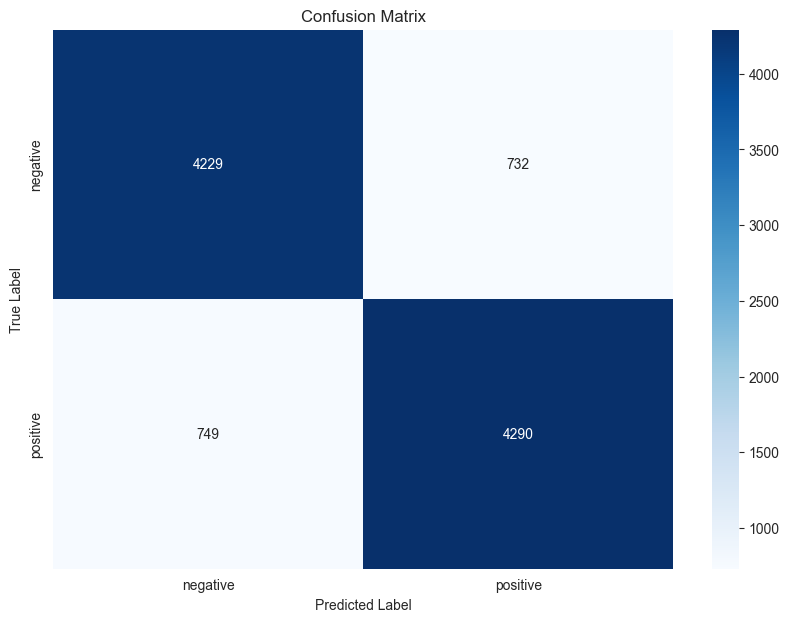

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'positive'], 
            yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [27]:
import joblib

# Save the model and the vectorizer to files
joblib.dump(model, 'sentiment_analysis_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.
